# Selection of R-functions

* Author: Johannes Maucher
* Last Update: 2017-09-26

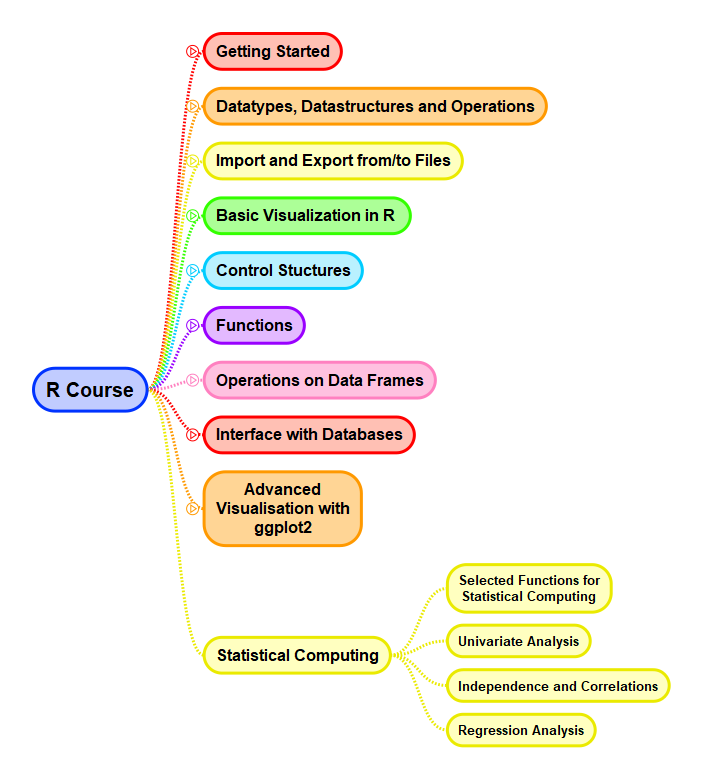

In [5]:
library("IRdisplay")
display_png(file="../../../Pics/DSRstatistical.PNG",width=900) 

## Functions for generating data

|       function       |                                           comment                                           |
|:--------------------:|:-------------------------------------------------------------------------------------------:|
| runif(n,min=0,max=1) | Generate n uniformly distributed random float numbers in the range between min and max      |
| rnorm(n,mean=0,sd=1) | Generate n Gaussian distributed random numbers with mean = mean and standard deviation = sd |

In [1]:
runif(8)
runif(5,0,10)

[1] 0.9887873 0.7296880 0.2901811 0.8519349 0.5168924 0.2868267 0.2347392
[8] 0.2269984

[1] 4.08822277 8.39924229 0.09162484 5.94426861 3.97026084

Generate random rounded numbers

In [2]:
unif<-runif(5,0,10)
unif
trunc(unif) 
floor(unif)
ceiling(unif)
round(unif,2)

[1] 2.246596 5.032821 8.710416 4.674509 9.012572

[1] 2 5 8 4 9

[1] 2 5 8 4 9

[1]  3  6  9  5 10

[1] 2.25 5.03 8.71 4.67 9.01

Setting the seed of a random number generator in order to obtain same random numbers:

In [3]:
set.seed(777)
runif(8)
set.seed(777)
runif(8)

[1] 0.68785741 0.49219261 0.34511557 0.99504991 0.69526717 0.01070004 0.34501585
[8] 0.17204948

[1] 0.68785741 0.49219261 0.34511557 0.99504991 0.69526717 0.01070004 0.34501585
[8] 0.17204948

### Binning

Generate random numbers:

In [4]:
rawdat<-runif(20,0,100)
rawdat

[1] 94.936067 24.919264 73.279031 66.028918 58.031692 59.478153 86.627149
 [8] 10.390263 41.830767 86.752282 35.235691 38.982536 38.046427 64.230564
[15] 52.159708 17.771081  2.999068 77.358162 48.653567 55.861891

Define Bins:

In [5]:
bins<-seq(0,100,10)
bins

[1]   0  10  20  30  40  50  60  70  80  90 100

Assign numbers to bins:

In [6]:
binDat<-cut(rawdat,bins)
binDat
class(binDat)

[1] (90,100] (20,30]  (70,80]  (60,70]  (50,60]  (50,60]  (80,90]  (10,20] 
 [9] (40,50]  (80,90]  (30,40]  (30,40]  (30,40]  (60,70]  (50,60]  (10,20] 
[17] (0,10]   (70,80]  (40,50]  (50,60] 
10 Levels: (0,10] (10,20] (20,30] (30,40] (40,50] (50,60] (60,70] ... (90,100]

[1] "factor"

Another way to define bins. Here the bins are defined such that over the entire value range of the numbers in rawdata 5 equally sized bins are generated.

In [8]:
bins2<-pretty(rawdat,5)
bins2
binDat2<-cut(rawdat,bins2)
binDat2

[1]   0  20  40  60  80 100

[1] (80,100] (20,40]  (60,80]  (60,80]  (40,60]  (40,60]  (80,100] (0,20]  
 [9] (40,60]  (80,100] (20,40]  (20,40]  (20,40]  (60,80]  (40,60]  (0,20]  
[17] (0,20]   (60,80]  (40,60]  (40,60] 
Levels: (0,20] (20,40] (40,60] (60,80] (80,100]

Distribution of numbers over the defined bins (histogram):

In [9]:
table(binDat2)

binDat2
  (0,20]  (20,40]  (40,60]  (60,80] (80,100] 
       3        4        6        4        3 

## Statistical Functions

|             function            |                                    comment                                    |
|:-------------------------------:|:-----------------------------------------------------------------------------:|
| mean(x)                         | Mean value of x                                                               |
| median(x)                       | Median value of x                                                             |
| sd(x)                           | Standard deviation of x                                                       |
| var(x)                          | Variance of x                                                                 |
| mad(x)                          | Median absolute deviation of x                                                |
| quantile(x, probs)              | Quantiles of x; Probs is a numeric vector with probabilities in [0,1]         |
| range(x)                        | Value range of x; returns sequence with lowest and highest value              |
| sum(x)                          | Sum of x                                                                      |
| diff(x,lag=n)                   | Difference of values in x; default lag is n=1                                 |
| min(x)                          | Minimum of x                                                                  |
| max(x)                          | Maximum of x                                                                  |
| scale(x,center=TRUE,scale=TRUE) | Standardization of x, optionally to mean=0 and/or to standard deviation of 1  |
|                                 |                                                                               |

### Statistical summary
The standard `summary()`-function already provides a list of descriptive statistics for all columns of a dataframe. As can be seen in the example above, the statistics calculated by `summary()` are:
* for numeric variables: min, max, mean and the quartiles
* for factor variables: a table of frequencies for all values of the variable


In [11]:
insurance<-read.csv(file="../data/insurance.csv", header=T,sep=",",stringsAsFactors = TRUE)
str(insurance)
summary(insurance)

'data.frame':	1338 obs. of  7 variables:
 $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : Factor w/ 2 levels "female","male": 1 2 2 2 2 1 1 1 2 1 ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 ...
 $ children: int  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : Factor w/ 2 levels "no","yes": 2 1 1 1 1 1 1 1 1 1 ...
 $ region  : Factor w/ 4 levels "northeast","northwest",..: 4 3 3 2 2 3 3 2 1 2 ...
 $ charges : num  16885 1726 4449 21984 3867 ...


      age            sex           bmi           children     smoker    
 Min.   :18.00   female:662   Min.   :15.96   Min.   :0.000   no :1064  
 1st Qu.:27.00   male  :676   1st Qu.:26.30   1st Qu.:0.000   yes: 274  
 Median :39.00                Median :30.40   Median :1.000             
 Mean   :39.21                Mean   :30.66   Mean   :1.095             
 3rd Qu.:51.00                3rd Qu.:34.69   3rd Qu.:2.000             
 Max.   :64.00                Max.   :53.13   Max.   :5.000             
       region       charges     
 northeast:324   Min.   : 1122  
 northwest:325   1st Qu.: 4740  
 southeast:364   Median : 9382  
 southwest:325   Mean   :13270  
                 3rd Qu.:16640  
                 Max.   :63770  

If the descriptive statistics provided by `summary()` are not sufficient, a function can be defined, which calculates the desired statistics. Once such a function is defined, it can easily be applied to dataframes using `sapply()`. This is demonstrated in the code cells below:

In [12]:
stat_summary <- function(x, na.omit=FALSE){
                if (na.omit)
                    x <- x[!is.na(x)]
                if (class(x)=='factor'){
                    return(table(x))
                } else {
                    m <- mean(x)
                    n <- length(x)
                    s <- sd(x)
                    skew <- sum((x-m)^3/s^3)/n
                    kurt <- sum((x-m)^4/s^4)/n - 3
                    return(c(n=n, mean=m, stdev=s, skew=skew, kurtosis=kurt))
                    }
              }

In [13]:
numeric_cols <- c("age", "bmi", "children","charges")
sapply(insurance[numeric_cols], stat_summary)

,age,bmi,children,charges
n,1338.00000000,1338.00000000,1338.0000000,1338.000000
mean,39.20702541,30.66339686,1.0949178,13270.422265
stdev,14.04996038,6.09818691,1.2054927,12110.011237
skew,0.05554775,0.28341055,0.9362775,1.512483
kurtosis,-1.24754314,-0.05942352,0.1924401,1.588954


In [14]:
factor_cols <- c("sex", "smoker", "region")
sapply(insurance[factor_cols], stat_summary)

$sex
x
female   male 
   662    676 

$smoker
x
  no  yes 
1064  274 

$region
x
northeast northwest southeast southwest 
      324       325       364       325 


### Statistics by group

In [15]:
aggregate(insurance[numeric_cols], by=list(smoker=insurance$smoker),mean)

smoker,age,bmi,children,charges
no,39.38534,30.65180,1.090226,8434.268
yes,38.51460,30.70845,1.113139,32050.232


In [16]:
dstats <- function(x){
    sapply(x, stat_summary)
}
by(insurance[numeric_cols], insurance$smoker, dstats)

insurance$smoker: no
                   age          bmi     children     charges
n        1064.00000000 1064.0000000 1064.0000000 1064.000000
mean       39.38533835   30.6517951    1.0902256 8434.268298
stdev      14.08341002    6.0431114    1.2181361 5993.781819
skew        0.02967426    0.2758359    1.0005457    1.533786
kurtosis   -1.27350581   -0.0690306    0.3697293    3.117292
------------------------------------------------------------ 
insurance$smoker: yes
                 age          bmi    children       charges
n        274.0000000 274.00000000 274.0000000   274.0000000
mean      38.5145985  30.70844891   1.1131387 32050.2318315
stdev     13.9231856   6.31864398   1.1570657 11541.5471756
skew       0.1557333   0.30529854   0.6421258     0.1268169
kurtosis  -1.1385659  -0.06674552  -0.6756107    -1.0538177

## Probability distribution
R provides functions for many probability distributions. For example the name `norm` refers to a normal distribution. By applying different characters as prefix to the distribution name, different functions concerning this distribution can be applied:

* Prefix `d`, followed by name of the distribution yields the corresponding **probability density distribution**. E.g. `dnorm(x,m,sd)` returns the probability density of a normal distribution with mean `m` and standard deviation `sd`.
* Prefix `p`, followed by name of the distribution yields the corresponding **probability distribution**. E.g. `pnorm(x,m,sd)` returns the probability that the value of a normal-distributed variable with mean `m` and standard deviation `sd` is smaller than `x`.
* Prefix `q`, followed by name of the distribution yields the corresponding **quantile function**. E.g. `qnorm(q,m,sd)` returns the q-quantile of a normal-distributed variable with mean `m` and standard deviation `sd`.
* Prefix `r`, followed by name of the distribution **generates random samples** according to the given probability distribution. E.g. `rnorm(n,m,sd)` generates n random samples of a normal distribution with mean `m` and standard deviation `sd`.

This family of functions is demonstrated in the following subsections for the case of a normal distribution. Other probability density functions, which can be applied in the same way are, e.g. 

* Beta (beta), 
* Binomial (binom), 
* Cauchy (cauchy), 
* Chi-squared (chisq),
* Exponential (exp),
* F (f),
* Gamma (gamma),
* Geometric (geom),
* Lognormal (lnorm),
* Logistic (logis),
* Multinomial (multinom),
* Normal (norm),
* Poission (pois),
* T (t),
* Uniform (unif),
* Weibull (weibull).

The name in brackets is the abbreviation of the corresponding distribution in R.

### Probability density function

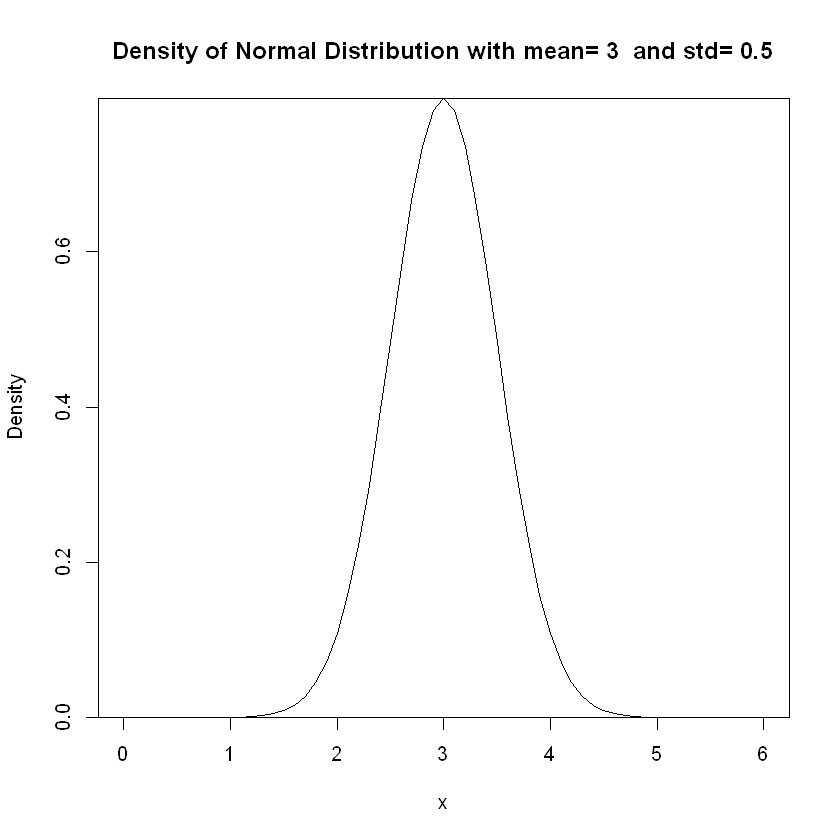

In [17]:
mean<-3
std<-0.5
x<-pretty(c(0,6),60)
#print(x)
y<-dnorm(x,mean,std)
plot(x,y,type="l",xlab="x",ylab="Density",yaxs="i")
title(paste("Density of Normal Distribution with mean=",mean," and std=",std))

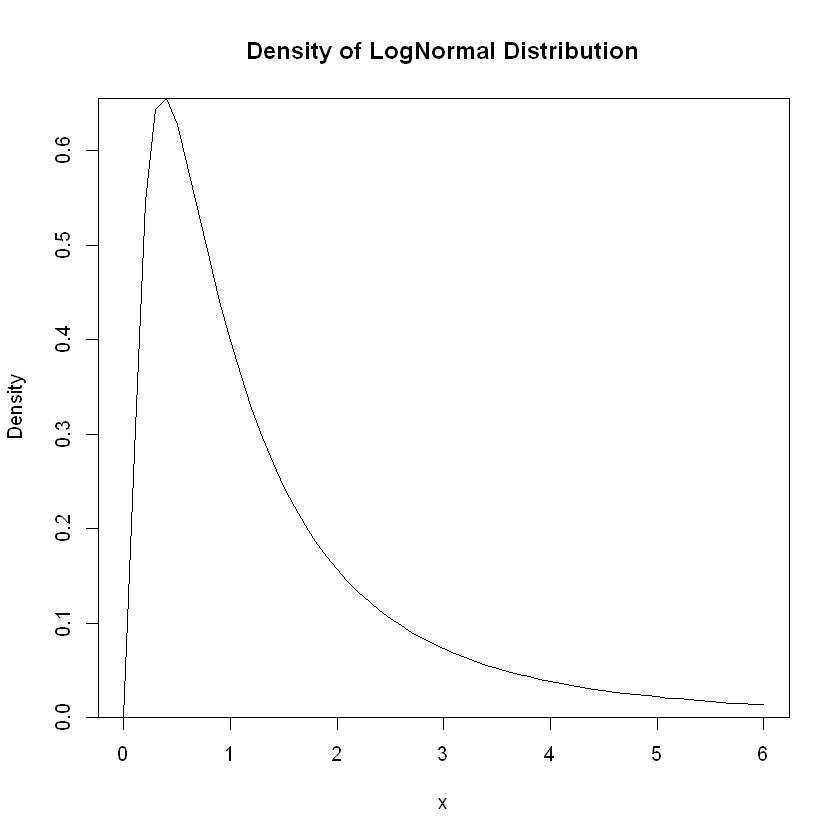

In [18]:
x<-pretty(c(0,6),60)
y<-dlnorm(x = x)
plot(x,y,type="l",xlab="x",ylab="Density",yaxs="i")
title("Density of LogNormal Distribution")

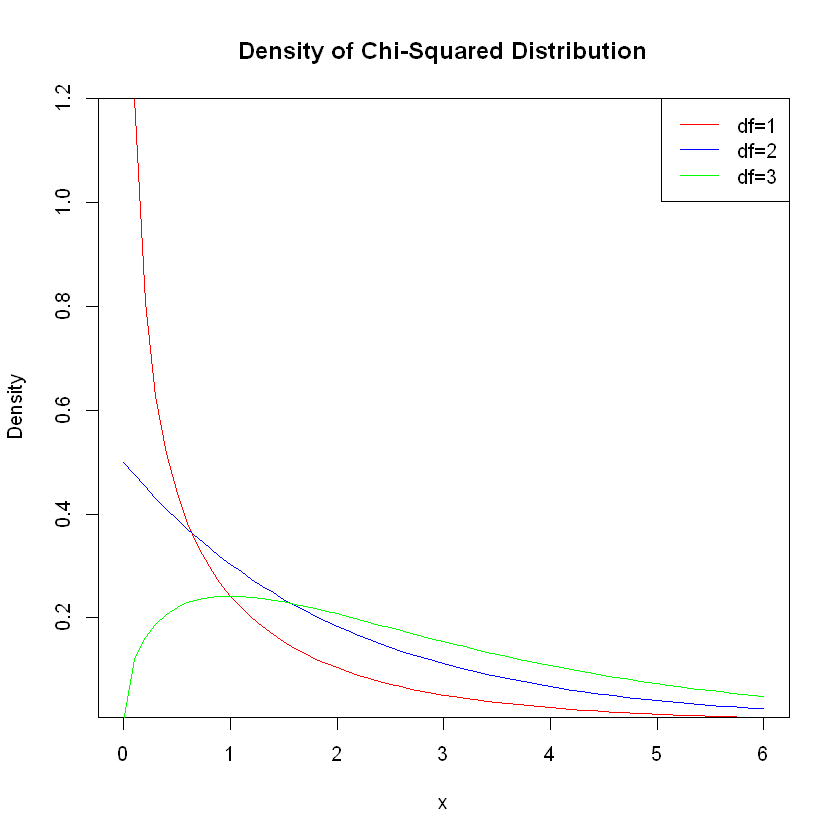

In [19]:
y1<-dchisq(x = x, df=1)
y2<-dchisq(x = x, df=2)
y3<-dchisq(x = x, df=3)
plot(x,y1,type="l",xlab="x",ylab="Density",yaxs="i",col="red",lty=1)
lines(x,y2,type="l",col="blue",lty=1)
lines(x,y3,type="l",col="green",lty=1)
legend('topright',c('df=1','df=2','df=3'),col=c("red","blue","green"),lty=c(1,1,1))
title("Density of Chi-Squared Distribution")

### Probability function
The probability that a normal distributed variable (mean=0, standard deviation =1) has a value in the range *[-1,..,1]* can be calculated as follows:

In [74]:
mean=0
std=1
pnorm(1,mean,std)-pnorm(-1,mean,std)

[1] 0.6826895

### Quantile function
The q%-quantile of a random variable determines the value, below which q% of all samples of the corresponding probability distribution fall. For example
the 95%-quantile of a normal distributed variable (mean=0, standard deviation =1) can be calculated as follows:

In [75]:
mean=0
std=1
qnorm(.95,mean,std)

[1] 1.644854

### Random generator function
*10* samples of a normal distribution with mean =0 and standard deviation = 1 can be generated as follows:

In [76]:
mean=0
std=1
rnorm(10,mean,std)

[1]  1.63868606  0.62127397  0.20270430  1.10893779 -0.20622475 -0.37896504
 [7] -0.30426166  0.05416232 -1.88093062 -0.03375647

## Generate samples of multidimensional normal distribution

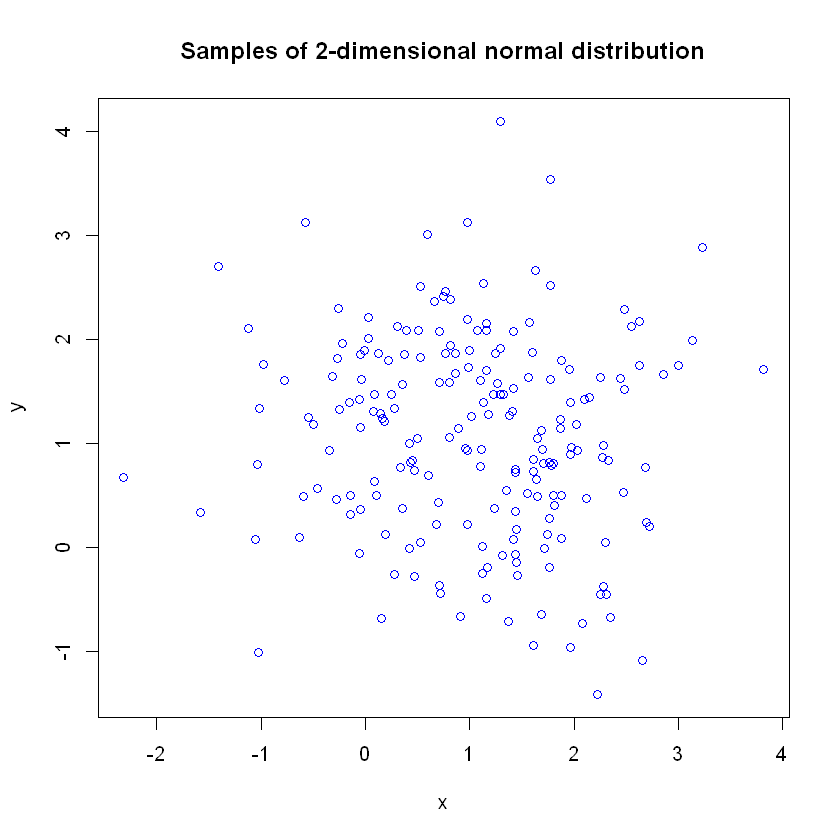

In [21]:
library(MASS)
meanVec<-c(1,1)
cov<-matrix(c(1,0,0,1),nrow=2,ncol=2)
dat2dim<-mvrnorm(200,meanVec,cov)
plot(dat2dim[,1],dat2dim[,2],col="blue",pch=1,xlab="x",ylab="y")
title("Samples of 2-dimensional normal distribution")
